In [2]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 11.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13873/2047810523.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13873/2047810523.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_crimes = df.resample('M').size()


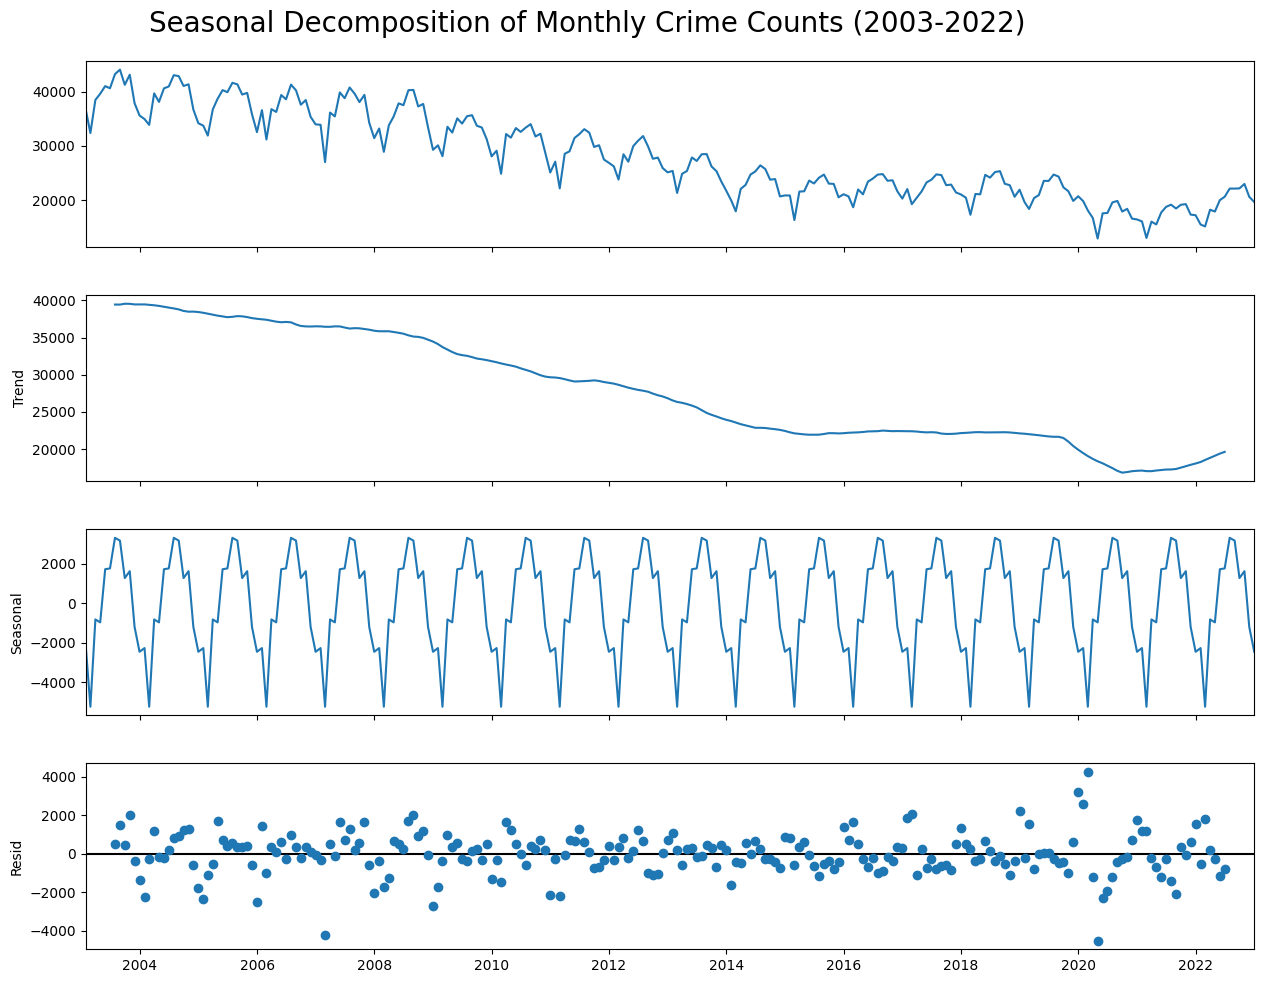

In [3]:
# 05_Seasonality_Decomposition.ipynb

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- Load the Cleaned Data ---
df = pd.read_csv('../data/CleanedCrime.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter to 2003-2022 ---
df = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2022)]

# --- Set Date as Index (needed for time series) ---
df = df.set_index('Date')

# --- Resample to Monthly Total Crimes ---
monthly_crimes = df.resample('M').size()

# --- Decompose ---
result = seasonal_decompose(monthly_crimes, model='additive', period=12)  # 12 months = 1 year

# --- Plot the Decomposition ---
fig = result.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Monthly Crime Counts (2003-2022)', fontsize=20, y=1.02)
plt.show()


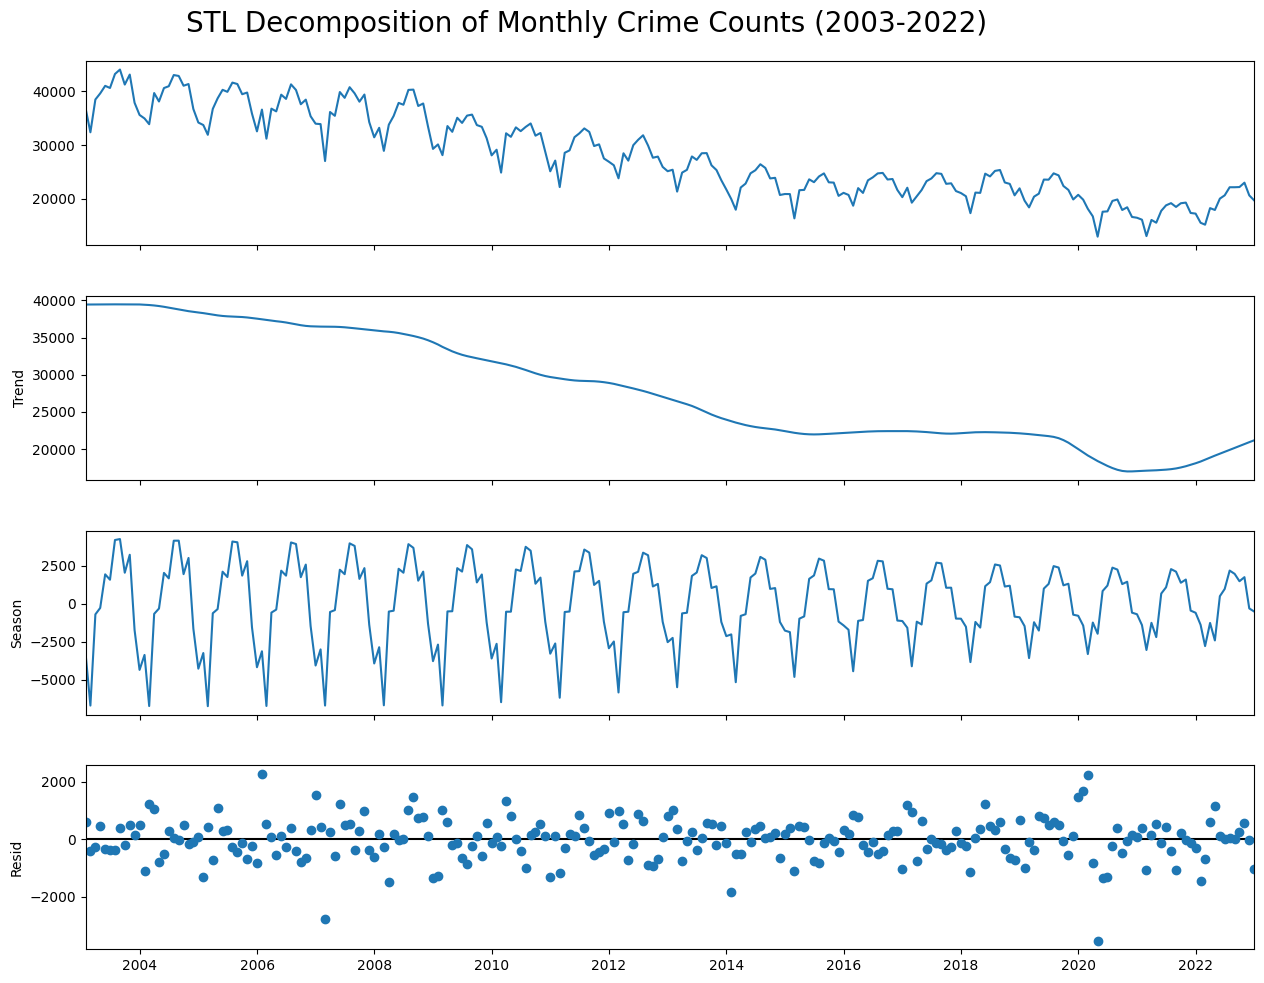

In [4]:
from statsmodels.tsa.seasonal import STL

# --- STL Decomposition ---
stl = STL(monthly_crimes, seasonal=13)  # slightly flexible window
res = stl.fit()

# --- Plot STL ---
fig = res.plot()
fig.set_size_inches(14, 10)
plt.suptitle('STL Decomposition of Monthly Crime Counts (2003-2022)', fontsize=20, y=1.02)
plt.show()
